# Indicadores Tecnicos

¿Qué son los indicadores tecnicos?

Los indicadores técnicos son herramientas matemáticas que ayuden en el análisis técnico para la interpretación del comportamiento del precio de un activo. 

Estos indicadores proporcionan información como:

* Dirección

* Fuerza

* Tendencia

## Librerias

In [1]:
# Manipulación de datos
import pandas as pd

# Extacción de datos.
import eikon as ek
import refinitiv.data as rd


# Visualización de datos 
import seaborn as sns
import matplotlib.pyplot as plt

# Libreria de configuración
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

# Libreria para analisis tecnico
import pandas_ta as ta
import mplfinance as mpf

# extras
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Se define la fecha para la extracción de datos
end = datetime.datetime.now() 
start = end - datetime.timedelta(days=3 * 365)

In [3]:
# Lectura de llave
cfg = cp.ConfigParser()
cfg.read('config.cfg')
ek.set_app_key(cfg["session"]["app_key"])
rd.open_session(app_key=cfg["session"]["app_key"])

<refinitiv.data.session.Definition object at 0x2a2c729d4c0 {name='workspace'}>

## Extraccion de precios

In [4]:
# Extracción de datos
## Se cambia el nombre del RIC por el su activo.
datos = ek.get_timeseries(rics="MSFT.O", start_date=start, end_date=end).rename(columns={"CLOSE":"Close",
                                                                                         "OPEN": "Open",
                                                                                         "HIGH":"High",
                                                                                         "LOW":"Low",
                                                                                         "VOLUME":"Volume"}).drop(["COUNT"], axis=1).astype("float")


## Graficos

Text(0, 0.5, 'Precios')

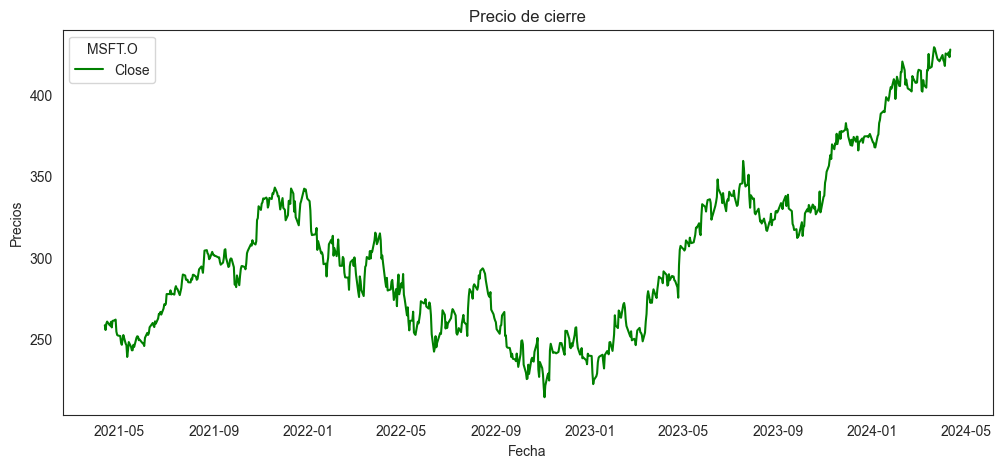

In [5]:
sns.set_style("white")
plt.figure(figsize=(12,5))
sns.lineplot(data=datos[["Close"]], palette=["green"], linewidth=1.5)
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("Precios")


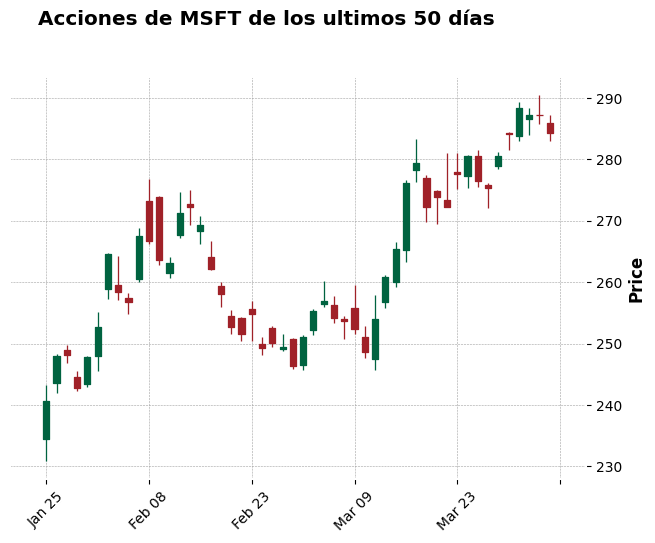

In [6]:
# De vela japonesa
mpf.plot(datos[450:500], type="candle", style="charles", title="Acciones de MSFT de los ultimos 50 días")

<Axes: xlabel='Date', ylabel='Volume'>

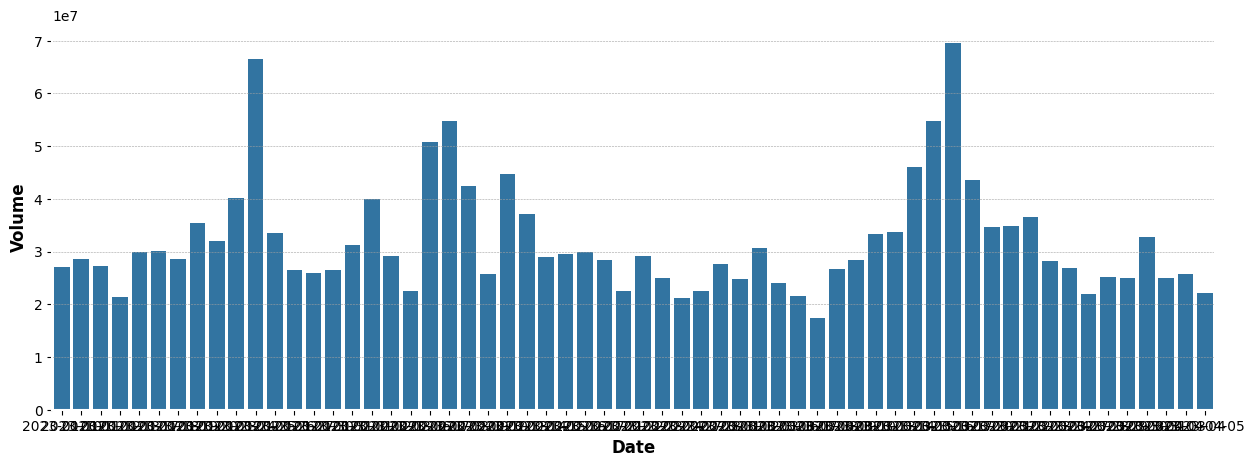

In [7]:
# De barra 
plt.figure(figsize=(15,5))
sns.barplot(data=datos[440:500]["Volume"])

## Indicadores tecnicos

### SMA

¿Que tipo de indicador es?

Text(0, 0.5, 'Precios')

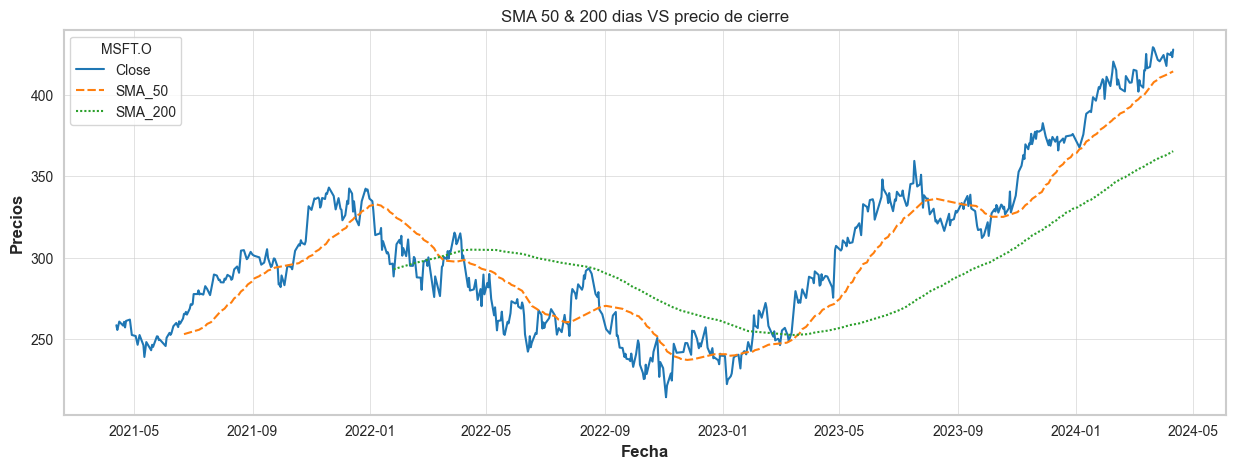

In [8]:
# Se genera el indicador.
datos["SMA_50"] = ta.sma(datos["Close"], length=50)
datos["SMA_200"] = ta.sma(datos["Close"], length=200)

# Se grafica el indicador
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[["Close", "SMA_50", "SMA_200"]], palette="tab10", linewidth=1.5)
plt.title("SMA 50 & 200 dias VS precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("Precios")

¿Cómo se intepreta?

`SMA de 50 días`.

Se utiliza comúnmente para analizar tendencias a medio plazo. Cuando el precio del activo está por encima de su SMA de 50 días, se considera que la tendencia es alcista. 

Por otro lado, si el precio está por debajo del SMA de 50 días, se considera que la tendencia es bajista.

`SMA de 200 días`

Se utiliza para analizar tendencias a largo plazo y es especialmente importante para identificar la dirección general del mercado. Cuando el precio está por encima del SMA de 200 días, se considera que la tendencia es alcista a largo plazo. 

Si el precio está por debajo del SMA de 200 días, se considera que la tendencia es bajista a largo plazo.


### MACD (Moving Average Convergence Divergence)

Text(0, 0.5, 'Intervalos')

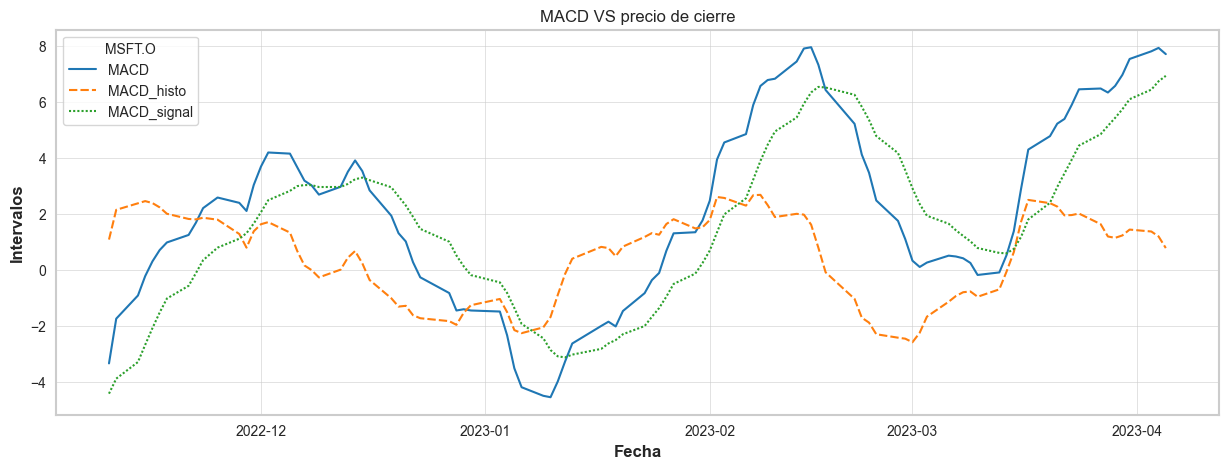

In [9]:
datos[["MACD", "MACD_histo", "MACD_signal"]] = ta.macd(datos["Close"])

# Se grafica el indicador 
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[400:500][["MACD", "MACD_histo", "MACD_signal"]], palette="tab10", linewidth=1.5)
plt.title("MACD VS precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("Intervalos")

¿Cómo se interpreta?

`Línea MACD.`

Muestra el impulso del mercado y puede ayudar a identificar cambios en la tendencia.

`Línea de Señal.`

Generar señales de compra o venta cuando cruza por encima o por debajo de la línea MACD.

`Histograma MACD.`

Cuando el histograma es positivo, indica un impulso alcista, y cuando es negativo, indica un impulso bajista.


Las señales de compra se generan cuando la línea MACD cruza por encima de la línea de señal, indicando un impulso alcista. Por el contrario, las señales de venta se generan cuando la línea MACD cruza por debajo de la línea de señal, indicando un impulso bajista.





## ADX (Average Directional Index).

Text(0, 0.5, 'Intervalos')

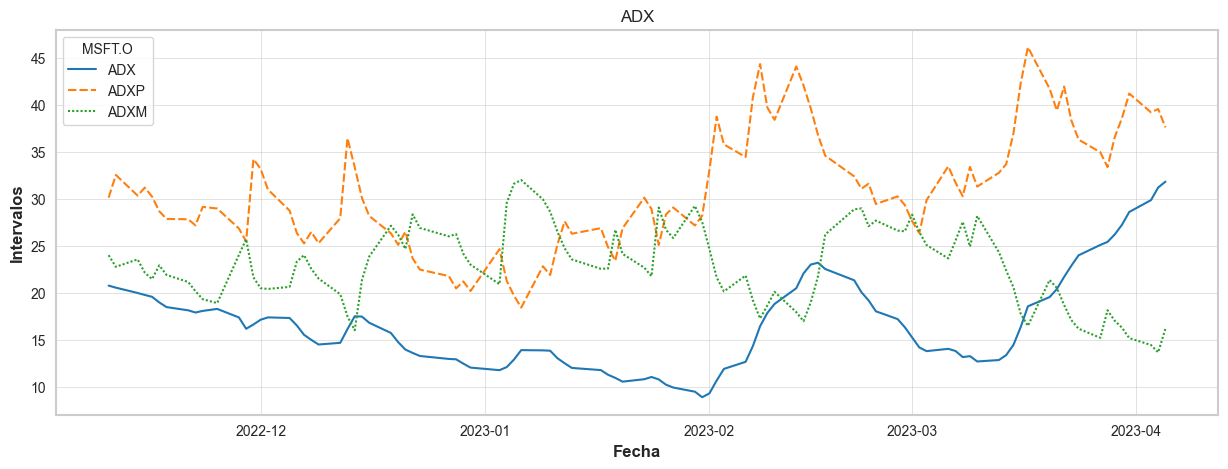

In [10]:
# Se genera el indicador
datos[["ADX", "ADXP", "ADXM"]] = ta.adx(datos["High"], datos["Low"], datos["Close"])

## Se grafica el indicador
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.lineplot(data=datos[400:500][["ADX", "ADXP", "ADXM"]], palette="tab10", linewidth=1.5)
plt.title("ADX")
plt.xlabel("Fecha")
plt.ylabel("Intervalos")

¿Cómo se interpreta?

`Fuerza de la tendencia.`

Cuando el ADX está por encima de un nivel específico (comúnmente 25 o 20), se considera que la tendencia es lo suficientemente fuerte como para operar. Valores más altos indican una tendencia más fuerte.

`Dirección de la tendencia.`

El ADX no indica la dirección de la tendencia, solo mide su fuerza. Sin embargo, se pueden utilizar otros componentes del Sistema Direccional para determinar la dirección de la tendencia. Los indicadores direccionales positivos (+DI) y negativos (-DI) se utilizan para determinar la dirección de la tendencia.

`Cambios en la tendencia.`

Los cruces y divergencias entre el ADX y los componentes direccionales pueden proporcionar señales de cambios en la tendencia. Por ejemplo, un cruce alcista donde +DI cruza por encima de -DI, junto con un aumento en el ADX, puede indicar un fortalecimiento de una tendencia alcista.

### SAR parabolico

Text(0, 0.5, 'Precios')

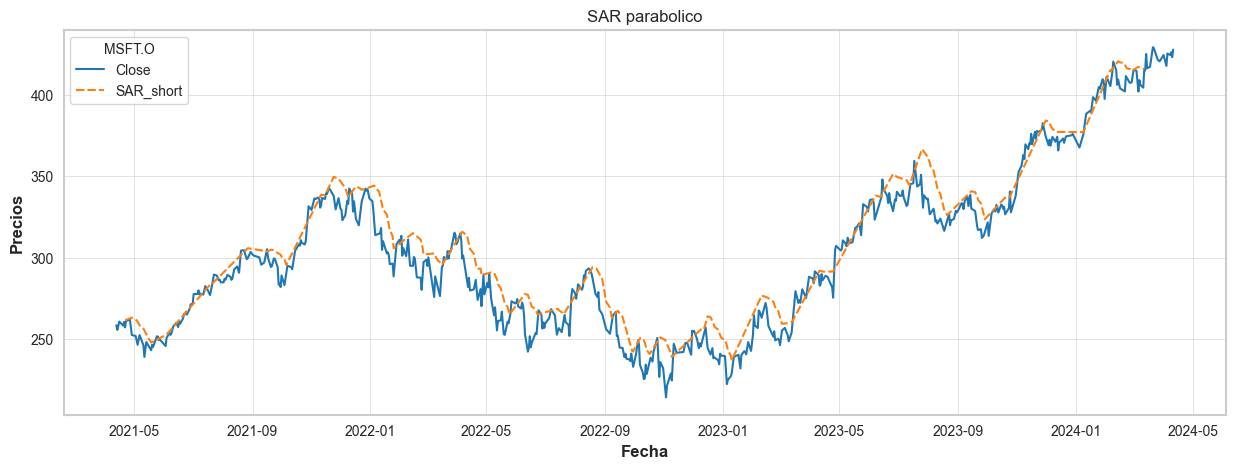

In [11]:
# Se genera el indicador
datos[["SAR_long", "SAR_short", "SAR_af", "SAR_reversed"]] = ta.psar(datos["High"], datos["Low"], datos["Close"])

# Se grafica el indicador
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[["Close", "SAR_short"]], palette="tab10", linewidth=1.5)
plt.title("SAR parabolico")
plt.xlabel("Fecha")
plt.ylabel("Precios")

¿Cómo se interpreta?

`Tendencia alcista.`

Cuando los puntos del SAR parabólico están por debajo de los precios, indica una tendencia alcista. Los puntos del SAR actúan como niveles de soporte ascendentes que se ajustan gradualmente conforme avanza la tendencia alcista.

`Tendencia bajista.`

Cuando los puntos del SAR parabólico están por encima de los precios, indica una tendencia bajista. Los puntos del SAR actúan como niveles de resistencia descendentes que se ajustan gradualmente conforme avanza la tendencia bajista.

### CCI (Commodity Channel Index)

Text(0, 0.5, 'Intervalos')

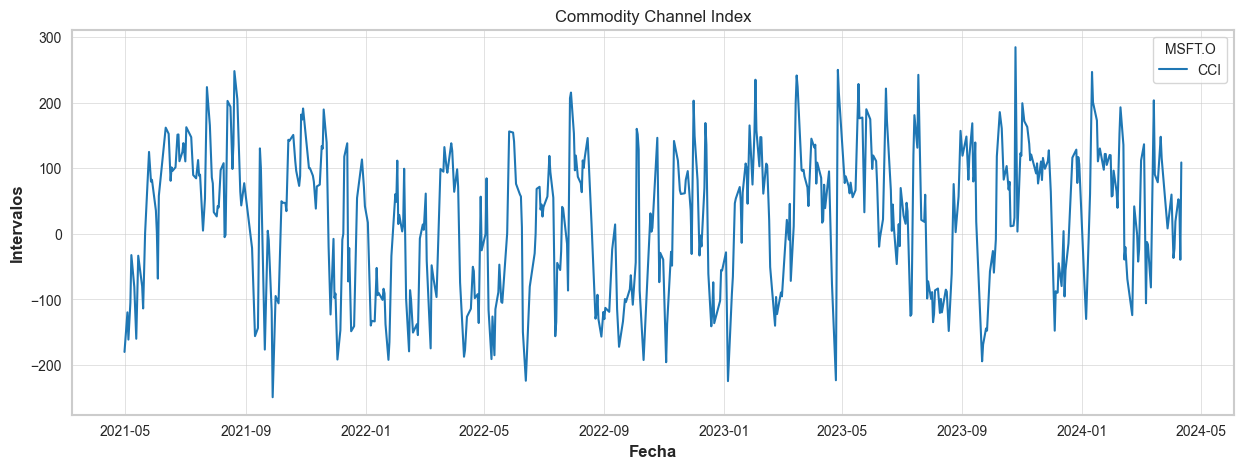

In [12]:
# Se genera el indicador
datos["CCI"] = ta.cci(datos["High"], datos["Low"], datos["Close"])

# Se grafica el indicador
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[["CCI"]], palette="tab10", linewidth=1.5)
plt.title("Commodity Channel Index")
plt.xlabel("Fecha")
plt.ylabel("Intervalos")

¿Cómo se interpreta?

`Condiciones de sobrecompra y sobreventa.`

El CCI oscila alrededor de una línea base cero. Los valores por encima de +100 suelen indicar que el activo está sobrecomprado, lo que sugiere que el precio puede estar sobreextendido y es probable que retroceda. Por otro lado, valores por debajo de -100 suelen indicar que el activo está sobrevendido, lo que sugiere que el precio puede estar infravalorado y es probable que se produzca un rebote al alza.

`Fuerza de la tendencia.`

Además de identificar condiciones de sobrecompra y sobreventa, el CCI también puede proporcionar información sobre la fuerza de la tendencia. Cuando el CCI se mantiene consistentemente por encima de +100 o por debajo de -100, indica que la tendencia es fuerte y que es probable que continúe en la misma dirección. Un CCI que oscila entre +100 y -100 puede indicar que el mercado está en una fase de consolidación o de rango.

### ROC (Rate of Change)

Text(0, 0.5, 'Intervalos')

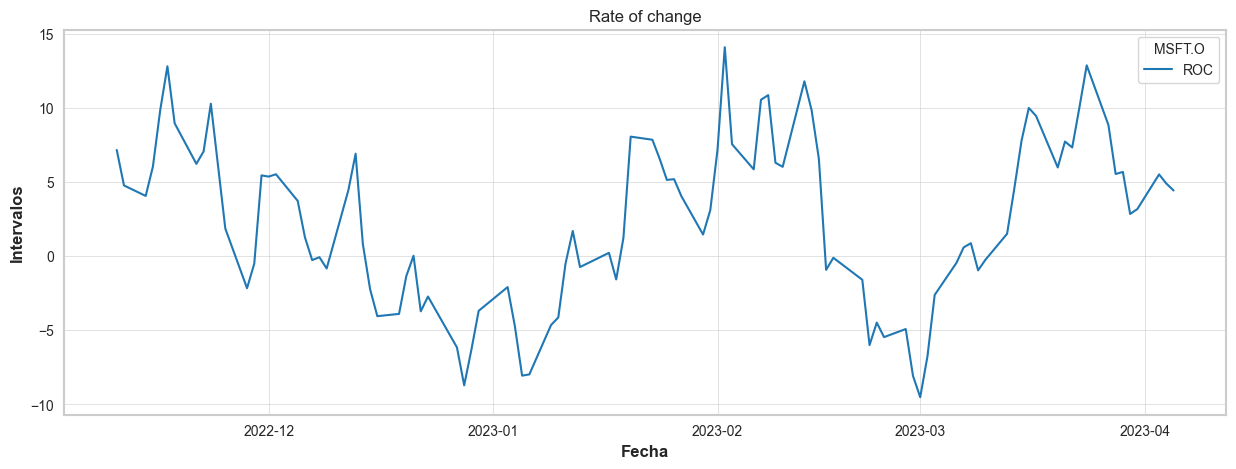

In [13]:
# Se calcula el indicador
datos["ROC"] = ta.roc(datos["Close"])

# Se grafica el indicador
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[400:500][["ROC"]], palette="tab10", linewidth=1.5)
plt.title("Rate of change")
plt.xlabel("Fecha")
plt.ylabel("Intervalos")

¿Cómo se interpreta?

`Tendencia alcista o bajista.`

Un ROC positivo indica que el precio actual es mayor que el precio de hace n períodos atrás, lo que sugiere una tendencia alcista. Por otro lado, un ROC negativo indica que el precio actual es menor que el precio de hace n períodos atrás, lo que sugiere una tendencia bajista.

### Oscilador de momento (Momentum Oscilator)

Text(0, 0.5, 'Intervalos')

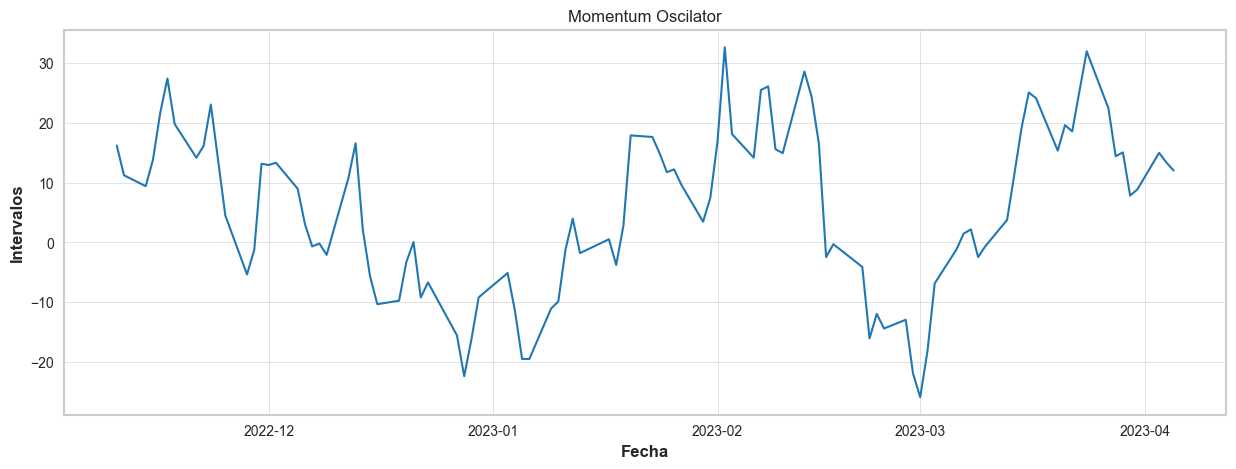

In [15]:
# Se calcula el indicador
datos["Momentum"] = ta.mom(datos["Close"])

# Se grafica el indicador
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[400:500]["Momentum"], palette="tab10", linewidth=1.5)
plt.title("Momentum Oscilator")
plt.xlabel("Fecha")
plt.ylabel("Intervalos")

¿Cómo se interpreta?

`Identificación de tendencias.`

Los valores positivos del Oscilador de Momento indican un impulso alcista, mientras que los valores negativos indican un impulso bajista. Un cambio de signo en el Oscilador de Momento puede ser indicativo de un cambio en la dirección del precio.

### OBV (On-Balance Volume)

<Axes: xlabel='Date', ylabel='OBV'>

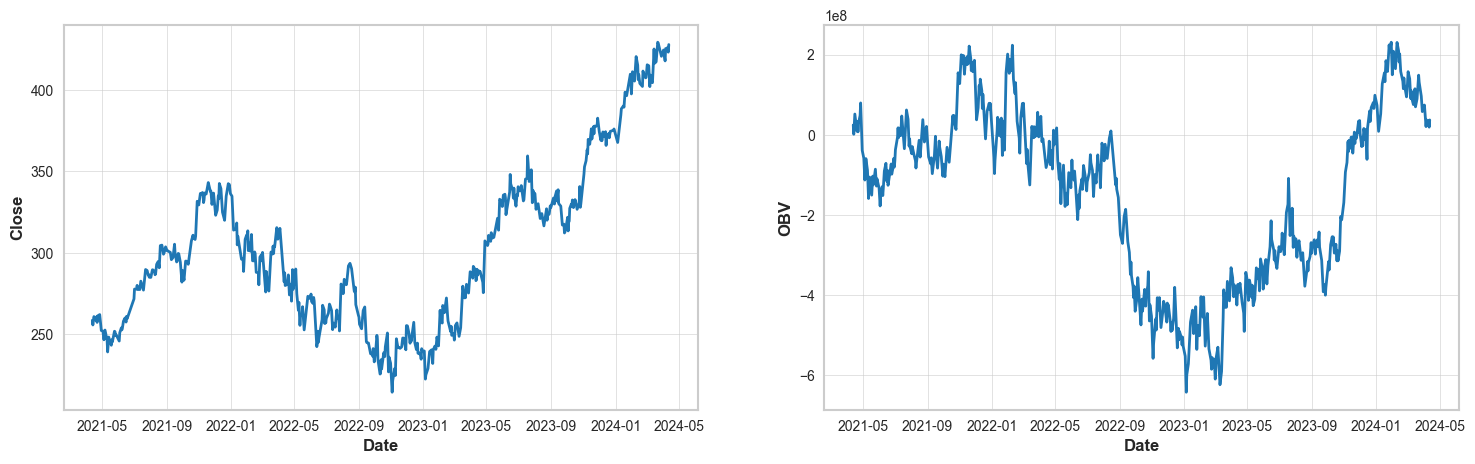

In [16]:
# Se calcula el indicador
datos["OBV"] = ta.obv(datos["Close"], datos["Volume"])

# Se divid3e el grafico
fig, axes = plt.subplots(1,2, figsize=(18,5))

sns.lineplot(ax=axes[0], data=datos["Close"])

sns.lineplot(ax=axes[1], data=datos["OBV"])

`Confirmación de tendencias.`

Si el precio de un activo sube acompañado de un aumento en el OBV, se considera que hay una confirmación de la tendencia alcista. 

Del mismo modo, si el precio cae acompañado de un descenso en el OBV, se considera que hay una confirmación de la tendencia bajista.

### Chaikin Money Flow (CMF)

<Axes: xlabel='Date', ylabel='CMF'>

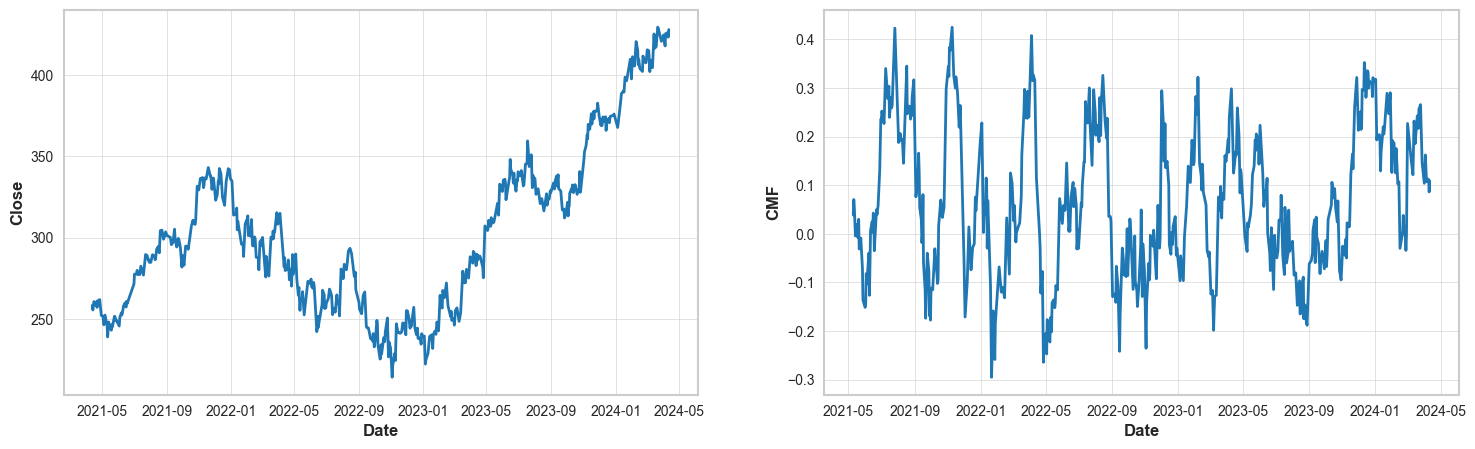

In [17]:
# Se genera el indicador
datos["CMF"] =ta.cmf(datos["High"], datos["Low"], datos["Close"], datos["Volume"])

# Se grafica el indicador
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.lineplot(ax=axes[0], data=datos["Close"])
sns.lineplot(ax=axes[1], data=datos["CMF"])

¿Cómo se interpreta?

`Interpretación de valores.`

Los valores positivos del CMF indican que el dinero está entrando en el activo, lo que sugiere una presión de compra. 

Por otro lado, los valores negativos del CMF indican que el dinero está saliendo del activo, lo que sugiere una presión de venta. Los valores cercanos a cero pueden indicar que la presión de compra y venta está equilibrada.

`Confirmación de tendencias.`

Si el precio de un activo sube acompañado de un aumento en el CMF, se considera que hay una confirmación de la tendencia alcista.

Del mismo modo, si el precio cae acompañado de un aumento en el CMF negativo, se considera que hay una confirmación de la tendencia bajista.

### VWAP (Weighted Moving Average Price)

Text(0, 0.5, 'Precios')

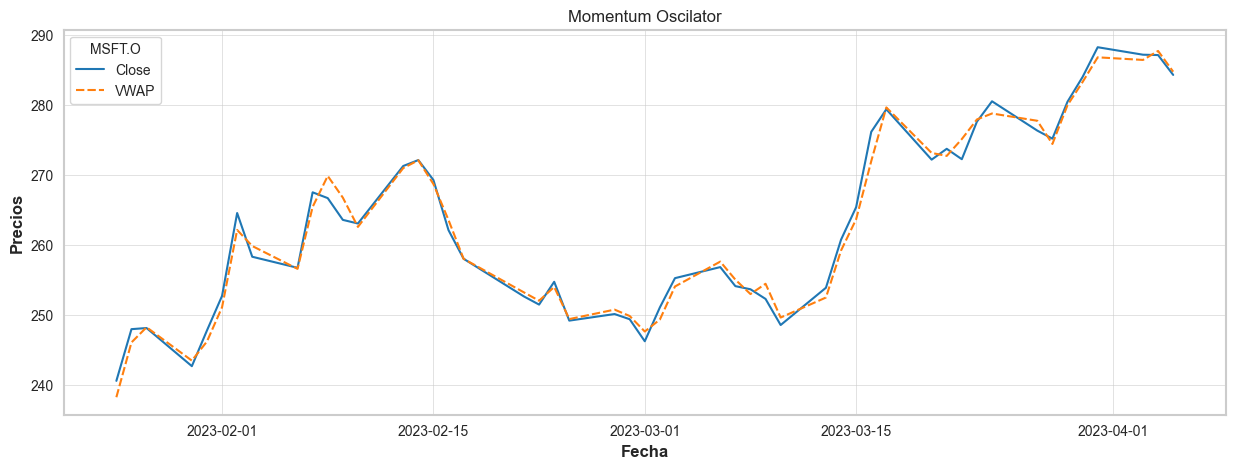

In [19]:
# Se genera el indicador
datos["VWAP"] = ta.vwap(datos["High"], datos["Low"],datos["Close"], datos["Volume"])

# Se grafica el indicador
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[450:500][["Close", "VWAP"]], palette="tab10", linewidth=1.5)
plt.title("Momentum Oscilator")
plt.xlabel("Fecha")
plt.ylabel("Precios")

¿Cómo se interpreta?

`Utilidad del VWAP.`

El VWAP se utiliza para evaluar si el precio actual de un activo está por encima o por debajo del precio medio ponderado por el volumen durante el día. Se considera que el VWAP es un indicador útil para determinar si un trader está operando en un precio mejor o peor que el precio medio del día.

### ATR (Average True Rate)

Text(0, 0.5, 'Intervalos')

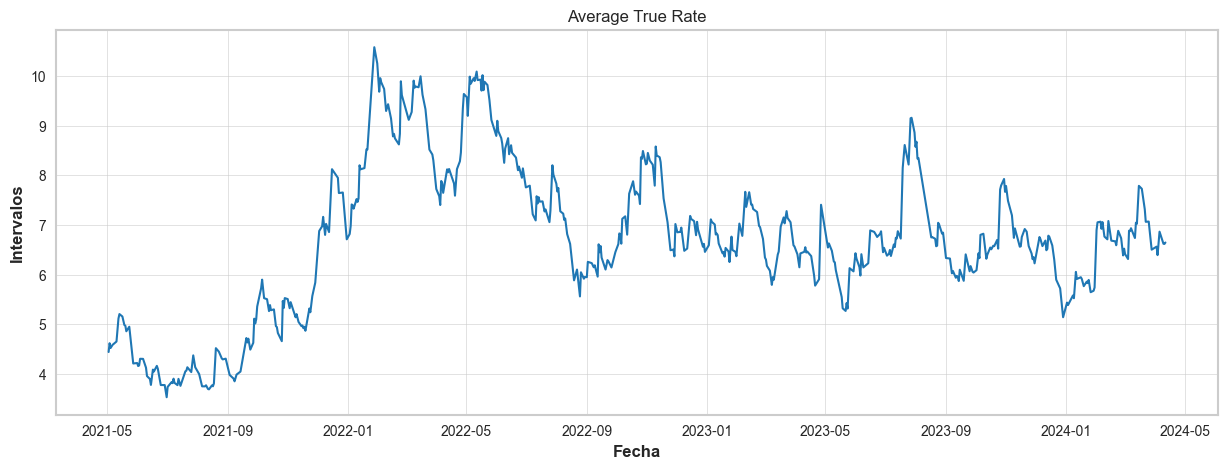

In [21]:
# Se genera el indicador 
datos["ATR"] = ta.atr(datos["High"], datos["Low"],datos["Close"])

# Se grafica el indicador
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos["ATR"], palette="tab10", linewidth=1.5)
plt.title("Average True Rate")
plt.xlabel("Fecha")
plt.ylabel("Intervalos")

¿Cómo se interpreta?

`Interpretación del ATR.`

Proporciona una medida de la volatilidad del mercado. Cuanto mayor sea el valor del ATR, mayor será la volatilidad del mercado, y viceversa. 

Por ejemplo, un ATR alto indicaría que los precios están cambiando rápidamente, mientras que un ATR bajo indicaría que los precios están más estables.

`Identificación de cambios en la volatilidad.`

Los cambios en el ATR pueden indicar cambios en la volatilidad del mercado. Un aumento repentino en el ATR puede indicar un aumento en la volatilidad, mientras que una disminución en el ATR puede indicar una disminución en la volatilidad.


`Confirmación de tendencias.`

Algunos traders utilizan el ATR para confirmar tendencias de precios. Por ejemplo, un aumento en el ATR durante una tendencia alcista puede indicar un aumento en la fuerza de la tendencia.

### Bandas Bollinger (BB)

Text(0, 0.5, 'Precios')

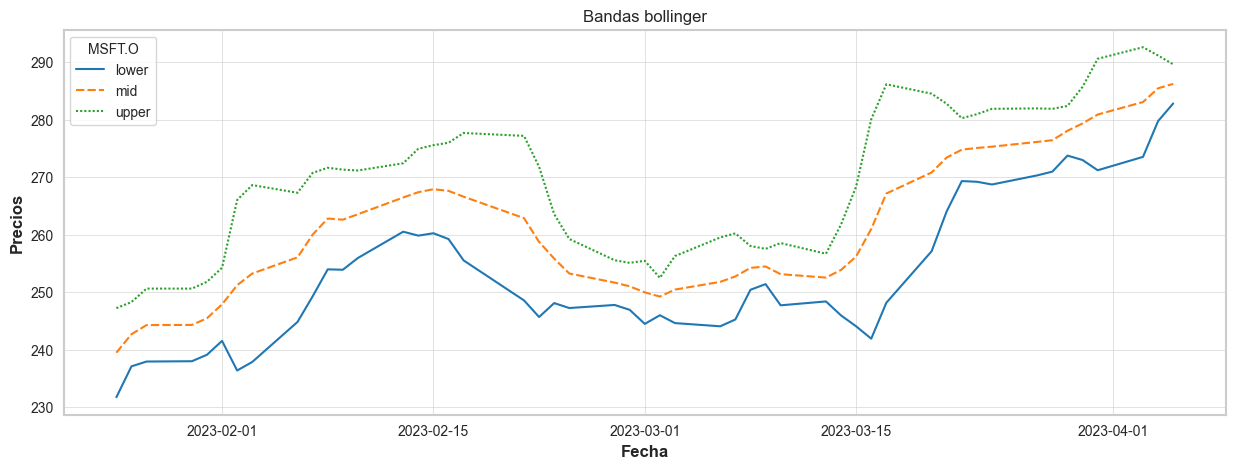

In [26]:
# Se calcula el idnciador 
datos[["lower", "mid", "upper", "BANDWIDTH", "Percen"]] = ta.bbands(datos["Close"])


# Se grafica el indicador 
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[450:500][["lower", "mid", "upper"]], palette="tab10", linewidth=1.5)
plt.title("Bandas bollinger")
plt.xlabel("Fecha")
plt.ylabel("Precios")

¿Cómo se interpreta?

`Interpretación de las bandas.`

Las Bandas de Bollinger se utilizan para evaluar si un activo está sobrecomprado o sobrevendido en relación con su precio reciente.

Cuando el precio toca o se acerca a la banda superior, puede indicar que el activo está sobrecomprado y que puede haber una reversión a la baja en el precio. 

Por otro lado, cuando el precio toca o se acerca a la banda inferior, puede indicar que el activo está sobrevendido y que puede haber una reversión al alza en el precio.

`Identificación de tendencias.`

Las Bandas de Bollinger también se pueden utilizar para identificar tendencias en el mercado.

Cuando las bandas se expanden, puede indicar un aumento en la volatilidad y una posible tendencia en desarrollo. 

Por otro lado, cuando las bandas se contraen, puede indicar una disminución en la volatilidad y una posible consolidación en el mercado.



## RSI (Relative Streght Index)

Text(0.5, 0, 'Fecha')

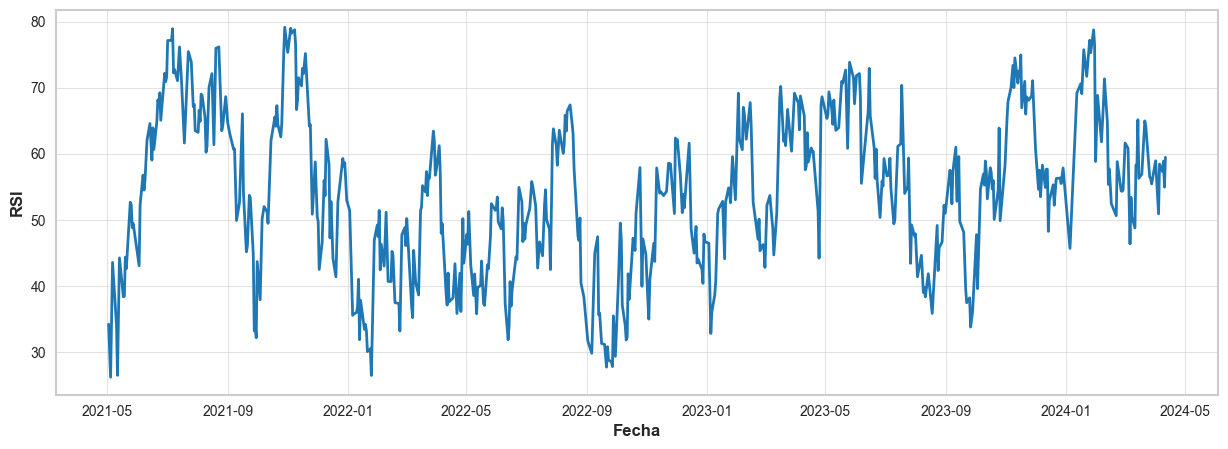

In [32]:
# Se define el indicador
datos["RSI"] = ta.rsi(datos.Close)

# Se define el tamaño del lienzo
plt.figure(figsize=(15,5))

# Se define los valores a graficar
sns.lineplot(data=datos["RSI"])

# Se agregan etiquetas de nombres
plt.ylabel("RSI")
plt.xlabel("Fecha")

`Línea de RSI.`

Un RSI alto (generalmente por encima de 70) puede indicar que el activo está sobrecomprado y es probable que se produzca una corrección a la baja. Por otro lado, un RSI bajo (generalmente por debajo de 30) puede indicar que el activo está sobrevendido y es probable que se produzca un rebote al alza.

### Stochastic Oscillator

Text(0, 0.5, 'Intevalos (porcentajes)')

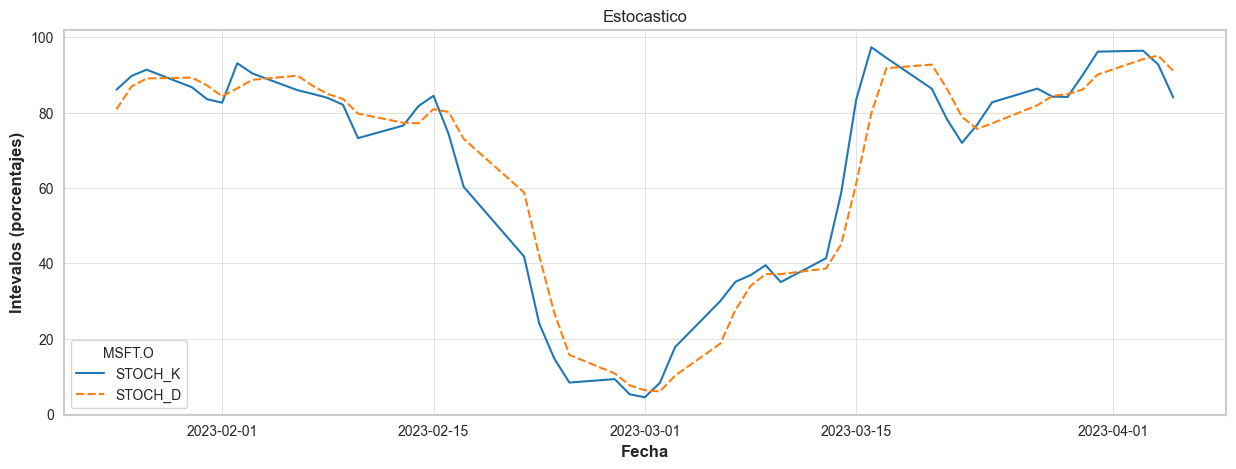

In [34]:
# Se genera el indicador
datos[["STOCH_K", "STOCH_D"]] = ta.stoch(datos["High"], datos["Low"], datos["Close"])

# Se grafica el indicador 
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.lineplot(data=datos[450:500][["STOCH_K", "STOCH_D"]], palette="tab10", linewidth=1.5)
plt.title("Estocastico")
plt.xlabel("Fecha")
plt.ylabel("Intevalos (porcentajes)")

¿Cómo se interpreta?

`Niveles de sobrecompra y sobreventa.`

El oscilador estocástico utiliza niveles de referencia para identificar posibles niveles de sobrecompra y sobreventa.

Por lo general, se considera que un valor por encima del 80% indica que el activo está sobrecomprado y que un retroceso a la baja podría ser inminente. 

Por otro lado, un valor por debajo del 20% indica que el activo está sobrevendido y que un rebote al alza podría ser inminente.

`Cruces de líneas`

Los cruces de las líneas %K y %D también pueden proporcionar señales de compra o venta. 

Por ejemplo, un cruce alcista donde la línea %K cruza por encima de la línea %D puede indicar un impulso alcista en el precio, mientras que un cruce bajista donde la línea %K cruza por debajo de la línea %D puede indicar un impulso bajista en el precio.